In [397]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG, Image 

# display at most 50 rows 
pd.set_option('display.max_rows', 30)


# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))



In [450]:
# data source: https://www1.toronto.ca/wps/portal/contentonly?vgnextoid=fa6be8c5a612c510VgnVCM10000071d60f89RCRD&vgnextchannel=1a66e03bb8d1e310VgnVCM10000071d60f89RCRD
# data was prepared and saved as CSV for the purposes of this presentation

In [96]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 3C29-C660

 Directory of C:\Users\Matt\Desktop\hack_the_six_pres\subway_data_analysis

2017-08-23  11:54 AM    <DIR>          .
2017-08-23  11:54 AM    <DIR>          ..
2017-08-23  10:36 AM    <DIR>          .ipynb_checkpoints
2017-08-23  09:42 AM               455 data_dictionary.csv
2017-08-23  09:41 AM             8,894 log_codes.csv
2017-08-23  11:54 AM         4,509,636 logs_20170101_20170630.csv
2017-08-23  09:45 AM           103,490 logs_201705.csv
2017-08-22  05:54 PM            19,606 Subway & SRT Log Codes.xlsx
2017-08-23  09:36 AM         3,738,729 Subway & SRT Logs (Jan01_14 to April30_17).xlsx
2017-08-23  11:54 AM         3,865,295 Subway & SRT Logs (Jan01_14 to June 30_17).xlsx
2017-08-22  05:48 PM           107,731 Subway & SRT Logs (May 2017).xlsx
2017-08-23  09:36 AM            12,704 Subway Delays Metadata.xlsx
2017-08-23  11:52 AM           121,853 TTC Subway Delay Analysis (done).ipynb
              10 File(

# Subway Map

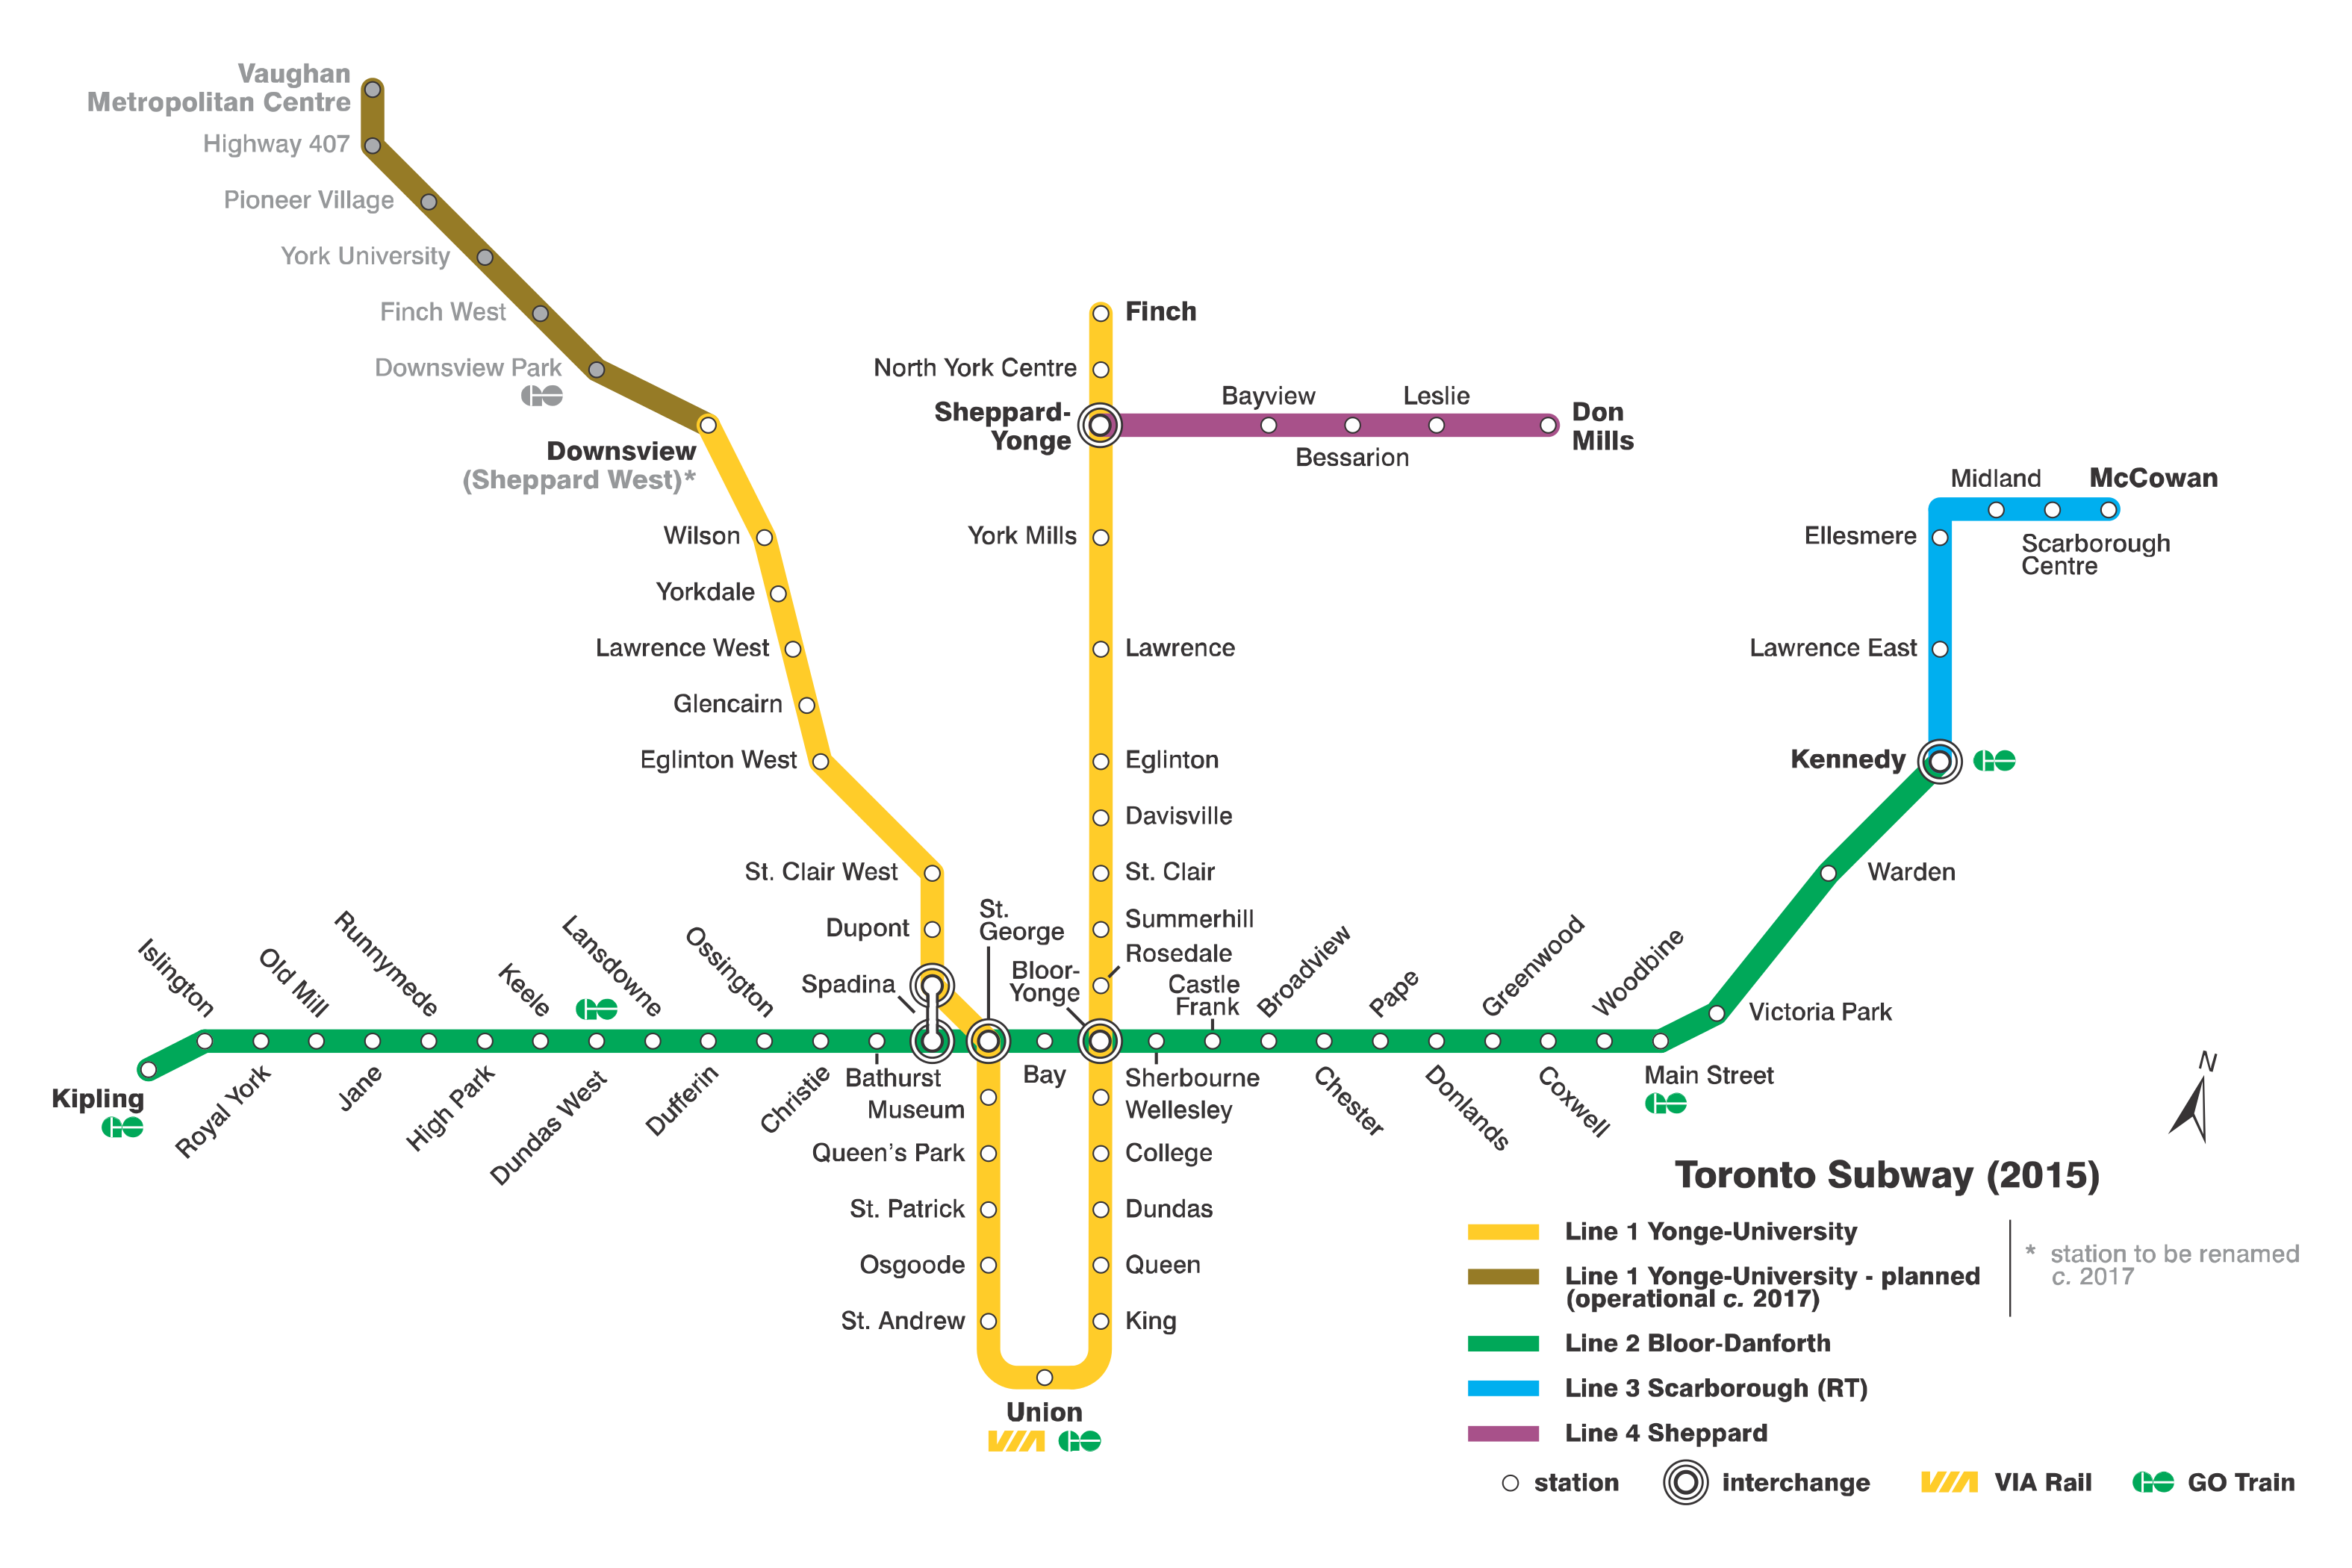

In [268]:
# subway hrs are 6am - 1:30am except sundays which is 8am-1:30am
Image(filename='TTC_subway_map_2015.png') 

# Preview the data

In [97]:
# data dictionary
metadata = pd.read_csv('data_dictionary.csv')

# raw data
raw = pd.read_csv('logs_20170101_20170630.csv')

# code definitions
codes = pd.read_csv('log_codes.csv')

In [98]:
metadata

,Field Name,Description,Example
0,Date,Date (YYYY/MM/DD),31-Dec
1,Time,Time (24h clock),1900-01-00 1:59
2,Day,Name of the day of the week,Saturday
3,Station,TTC subway station name,Rosedale Station
4,Code,TTC delay code,MUIS
5,Min Delay,Delay (in minutes) to subway service,5
6,Min Gap,Time length (in minutes) between trains,9
7,Bound,Direction of train dependant on the line,N
8,Line,"TTC subway line i.e. YU, BD, SHP, and SRT",YU
9,Vehicle,TTC train number,5961


In [99]:
codes

,RMENU CODE,CODE DESCRIPTION,CODE TYPE
0,EUAC,Air Conditioning,SUB RMENU CODE
1,EUAL,Alternating Current,SUB RMENU CODE
2,EUBK,Brakes,SUB RMENU CODE
3,EUBO,Body,SUB RMENU CODE
4,EUCA,Compressed Air,SUB RMENU CODE
5,EUCD,Consequential Delay (2nd Delay Same Fault),SUB RMENU CODE
6,EUCH,Chopper Control,SUB RMENU CODE
7,EUCO,Couplers,SUB RMENU CODE
8,EUDO,Door Problems - Faulty Equipment,SUB RMENU CODE
9,EUECD,ECD / Line Mechanic Related Prob.,SUB RMENU CODE


In [123]:
raw.head()

,Datestr,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386


Inital Questions
- what does a delay look like? How bad have they historically been? How could we go about this? How can we communicate these findings with a layman? What if we dont find anything big? What can we still say that has value to them? What more should we ask for?
-  whats the relationship between min gap and min delay?
- usually min delay == min gap.
- clean and combine date fields 
- append delay defintion to logs
- what does vehicle 0 mean?
- get counts/freq/etc.
- most common types of delays?
- when do various delays happen?
- maybe we can forecast common delays?
- what determines the vehicle number for a delay?


Assumptions
- min delay is independent of the time gap between streetcars arriving

# Data Preparation

In [101]:
raw_merged = pd.merge(raw,codes,how='left',left_on='Code',right_on='RMENU CODE')
# how many codes don't we have info on?
print('failed joins: %d \n' % (raw_merged[raw_merged['CODE TYPE'].isnull()].count()['Code']))
print("codes that didn't join:")
print(list(raw_merged[raw_merged['RMENU CODE'].isnull()].Code.unique()))
raw_merged.head()

failed joins: 1649 

codes that didn't join:
['MUNCA', 'PUSIC', 'PUTDN', 'TRNCA', 'MUCSA', 'ERTO', 'TUNCA', 'ETCA', 'TUTD', 'SFO', 'MTUI', 'SFDP', 'SFAP', 'MFO', 'PUTN', 'MTO', 'SFAE', 'XXXXX']


,Datestr,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,RMENU CODE,CODE DESCRIPTION,CODE TYPE
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,MUPR1,Priority One - Train in Contact With Person,SUB RMENU CODE
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,SUDP,Disorderly Patron,SUB RMENU CODE
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,NaN,NaN,NaN
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,SUDP,Disorderly Patron,SUB RMENU CODE
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,MUSAN,Unsanitary Vehicle,SUB RMENU CODE


In [102]:
codes[codes['RMENU CODE'] == 'PUTDN']

,RMENU CODE,CODE DESCRIPTION,CODE TYPE


In [103]:
codes[codes['RMENU CODE'] == 'PUTDN ']

,RMENU CODE,CODE DESCRIPTION,CODE TYPE
76,PUTDN,Debris At Track Level - Uncontrollable,SUB RMENU CODE


In [104]:
# after inspection we need to remove trailing spaces from the codes field before joining
raw['Code'] = raw['Code'].str.strip()
codes['RMENU CODE'] = codes['RMENU CODE'].str.strip()

In [224]:
raw_merged = pd.merge(raw,codes,how='left',left_on='Code',right_on='RMENU CODE')
print('failed joins: %d \n' % (raw_merged[raw_merged['CODE TYPE'].isnull()]['Time'].count()))
print("codes that didn't join:")
print(list(raw_merged[raw_merged['RMENU CODE'].isnull()].Code.unique()))
raw_merged.head()



failed joins: 1560 

codes that didn't join:
['MUNCA', 'PUSIC', 'TRNCA', 'MUCSA', 'ERTO', 'TUNCA', 'ETCA', 'TUTD', 'SFO', 'MTUI', 'SFDP', 'SFAP', 'MFO', 'PUTN', 'MTO', 'SFAE', 'XXXXX']


,Datestr,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,RMENU CODE,CODE DESCRIPTION,CODE TYPE
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,MUPR1,Priority One - Train in Contact With Person,SUB RMENU CODE
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,SUDP,Disorderly Patron,SUB RMENU CODE
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,NaN,NaN,NaN
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,SUDP,Disorderly Patron,SUB RMENU CODE
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,MUSAN,Unsanitary Vehicle,SUB RMENU CODE


In [ ]:
# create date+time column
raw_merged['Datestr_combined'] = pd.to_datetime(raw_merged['Datestr'] + ' ' + raw_merged['Time'])

In [148]:
# remove null records 
cleaned = raw_merged[~raw_merged['RMENU CODE'].isnull()]

# convert Datestr to time object
cleaned['Datestr'] = pd.to_datetime(cleaned['Datestr'])

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [273]:
# how many reecords have 0 time delay?
print("%d have a zero delay values" % (len(raw_merged[(raw_merged['Min Delay'] == 0) & (raw_merged['Min Gap'] == 0 )])))
print("%d have a non-zero delay values" % (len(raw_merged)))

52548 have a zero delay values
72218 have a non-zero delay values


In [183]:
cleaned.groupby('Datestr').count()['Time'].head(10)

Datestr
2014-01-01    38
2014-01-02    72
2014-01-03    51
2014-01-04    32
2014-01-05    30
2014-01-06    54
2014-01-07    61
2014-01-08    85
2014-01-09    85
2014-01-10    65
Name: Time, dtype: int64

In [311]:
cleaned['hour'] = cleaned['Datestr_combined'].dt.hour
cleaned['day_of_week'] = cleaned['Datestr_combined'].dt.dayofweek

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [184]:
cleaned.groupby('Datestr').count()['Time'].resample('W').sum().head()

Datestr
2014-01-05    223
2014-01-12    404
2014-01-19    336
2014-01-26    377
2014-02-02    427
Freq: W-SUN, Name: Time, dtype: int64

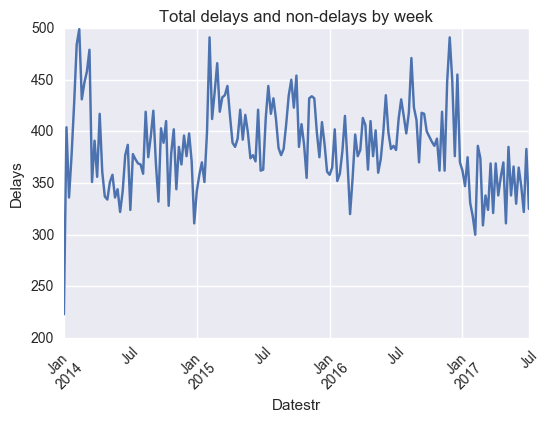

In [286]:
# plotting the weekly number of delays as a time series  
# note that this includes the total number of incidents with 0 delay time
cleaned.groupby('Datestr').count()['Time'].resample('W').sum().plot(rot=45)
plt.title('Total delays and non-delays by week')
plt.ylabel('Frequency')

# Split dataset into delays and non-delays

Define a *delay*  with a Min Gap > 0 or Min Delay > 0

Define a *non-delay* to be one where both Min Gap and Min Delay are recorded as 0

## Delays

In [312]:
delays = cleaned[(cleaned['Min Delay'] > 0) | (cleaned['Min Gap'] > 0 )]

In [291]:
# whats the relationship between min gap and min delay?
print(len(delays[delays['Min Gap'] == delays['Min Delay']]))
print(len(delays[delays['Min Gap'] < delays['Min Delay']]))
print(len(delays[delays['Min Gap'] > delays['Min Delay']]))
print(len(delays[(delays['Min Gap'] > 0) & (delays['Min Delay'] == 0)]))

7
537
19121
14


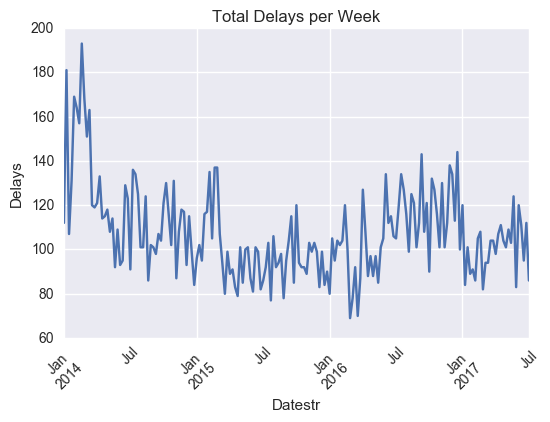

In [340]:
delays.groupby('Datestr').count()['Time'].resample('W').sum().plot(rot=45)
plt.title('Total Delays per Week')
plt.ylabel('Delays')

In [321]:
delays.head()

,Datestr,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,RMENU CODE,CODE DESCRIPTION,CODE TYPE,Datestr_combined,hour,day_of_week
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,MUPR1,Priority One - Train in Contact With Person,SUB RMENU CODE,2014-01-01 00:21:00,0,2
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,SUDP,Disorderly Patron,SUB RMENU CODE,2014-01-01 02:06:00,2,2
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,SUDP,Disorderly Patron,SUB RMENU CODE,2014-01-01 03:10:00,3,2
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,MUSAN,Unsanitary Vehicle,SUB RMENU CODE,2014-01-01 03:20:00,3,2
12,2014-01-01,08:48,Wednesday,KIPLING STATION,MUNOA,5,0,E,BD,0,MUNOA,No Operator Immediately Available - Not E.S.A....,SUB RMENU CODE,2014-01-01 08:48:00,8,2


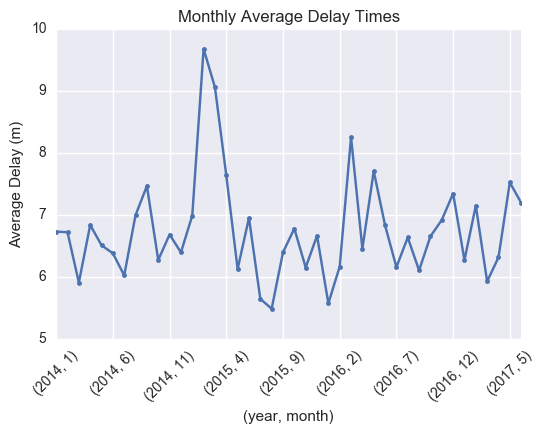

In [337]:
# for all delays each month what was their average min length
delays.groupby(by=[delays.Datestr.dt.year,delays.Datestr.dt.month]).mean()['Min Delay'].plot(marker='.',rot=45)
plt.title('Monthly Average Delay Times')
plt.ylabel('Average Delay (m)')
plt.xlabel('(year, month)')

In [260]:
# what are the most frequent delays?
delay_types_agg = delays.groupby(by='CODE DESCRIPTION').agg({'Time':'count',
                                               'Min Delay':'median',
                                              'Min Gap':'median'}).rename(columns={'Time':'count'})
delay_types_agg.sort_values(by='count',ascending=False).head(10)

,Min Delay,count,Min Gap
CODE DESCRIPTION,,,
Disorderly Patron,4.0,1483,8.0
Injured or ill Customer (On Train) - Medical Aid Refused,4.0,1390,7.0
Injured or ill Customer (On Train) - Transported,7.0,1202,10.0
Door Problems - Faulty Equipment,4.0,1157,8.0
Passenger Assistance Alarm Activated - No Trouble Found,3.0,855,7.0
Miscellaneous Speed Control,3.0,723,7.0
Fire/Smoke Plan B,12.0,687,16.0
Miscellaneous Other,4.0,632,8.0
Misc. Transportation Other - Employee Non-Chargeable,4.0,597,7.0


In [344]:
delay_types_agg.sort_values(by='Min Delay',ascending=False).head(5)
# delay_types_agg.sort_values(by='Min Gap',ascending=False).head(5)

,Min Delay,count,Min Gap
CODE DESCRIPTION,,,
Force Majeure,92.0,11,23.0
Priority One - Train in Contact With Person,65.5,84,68.5
Vehicle,29.5,2,6.0
Bomb Threat,16.0,32,19.5
Fire/Smoke Plan B,12.0,687,16.0


In [245]:
# count of of delay times (mins)
delay_freq = delays.groupby(by='Min Delay').size().sort_values(ascending=False)
print(delay_freq.head())
print(delay_freq.tail())

Min Delay
3    6479
4    4014
5    3012
6    1402
7     983
dtype: int64
Min Delay
111    1
113    1
115    1
788    1
999    1
dtype: int64


In [231]:
# what are these two huge delays? 
delays[delays['Min Delay']  > 700]

,Datestr,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,RMENU CODE,CODE DESCRIPTION,CODE TYPE,Datestr_combined,hour
2054,2014-02-05,12:35,Wednesday,MCCOWAN STATION,MRWEA,788,0,S,SRT,3012,MRWEA,Weather Reports / Related Delays,SRT RMENU CODE,2014-02-05 12:35:00,12
23112,2015-02-17,06:56,Tuesday,MCCOWAN STATION TO KEN,ERHV,999,999,N,SRT,3007,ERHV,High Voltage,SRT RMENU CODE,2015-02-17 06:56:00,6


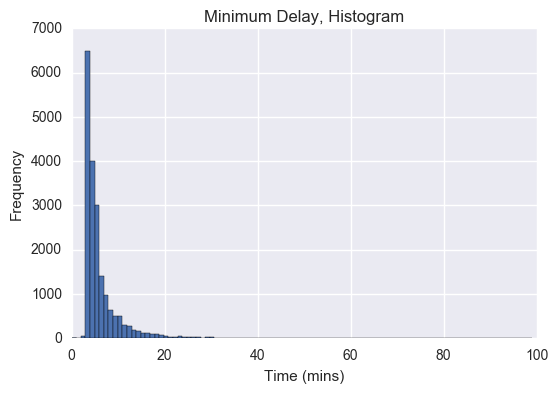

In [280]:
# ignore two large delays when plotting disbn
delays[delays['Min Delay'] < 100]['Min Delay'].hist(bins = 100)
plt.title('Minimum Delay Times, Histogram')
plt.xlabel('Time (mins)')
plt.ylabel('Frequency')


In [240]:
# group by bound
delays.groupby('Bound').size()

Bound
B       1
E    4608
N    4250
R       1
S    5735
W    4930
dtype: int64

In [277]:
# group by lines
delays.groupby('Line').size().sort_values(ascending=False)

Line
BD              8645
YU              8524
SRT             1578
SHP              911
YU/BD              1
66                 1
25 DON MILLS       1
dtype: int64

In [274]:
# filter out  one-off lines and codes
bounds = ['E','N','S','W']
lines = ['BD','SHP','SRT','YU']

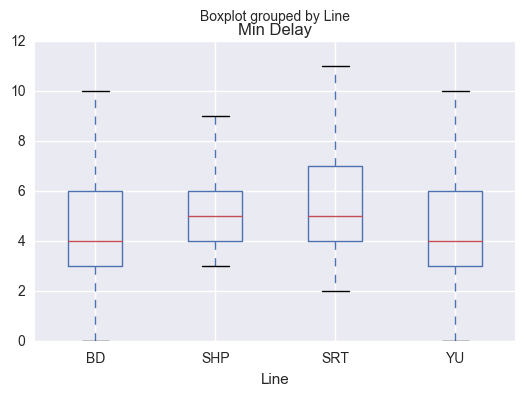

In [278]:
# delay times by line
delays[delays['Line'].isin(lines)][['Line','Min Delay','Min Gap']].boxplot(column='Min Delay',by='Line',showfliers=False)


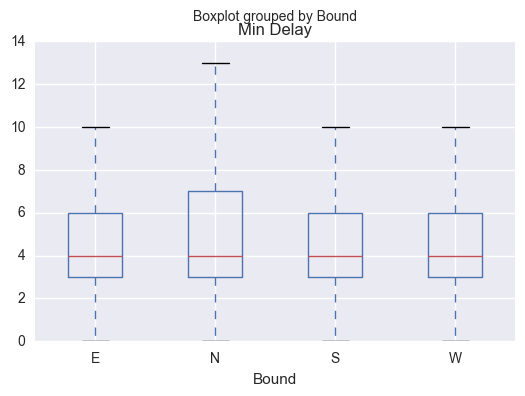

In [368]:
delays[delays['Bound'].isin(bounds)][['Bound','Min Delay','Min Gap']].boxplot(column='Min Delay',by='Bound',showfliers=False)

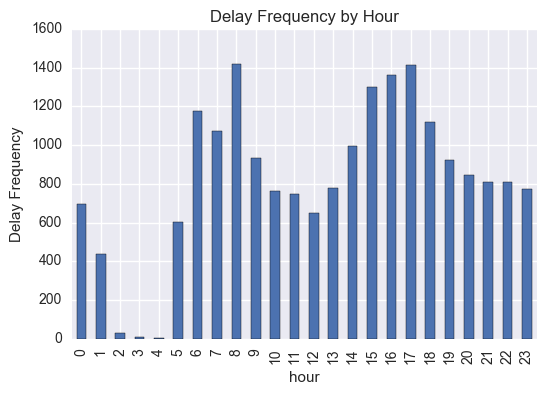

In [309]:
# delay frequency by hour
delays.groupby(by='hour').count()['Datestr'].plot(kind='bar')
plt.title('Delay Frequency by Hour')
plt.ylabel('Delay Frequency')

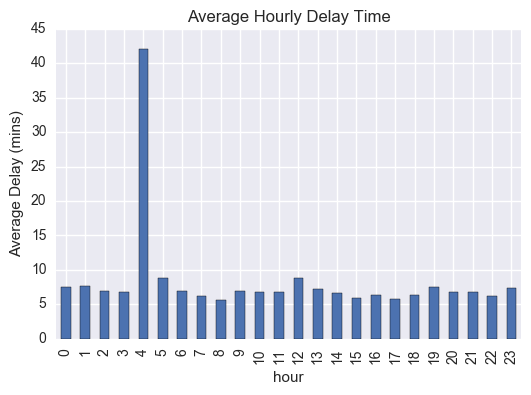

In [383]:
# average delay by hour
delays.groupby(by='hour').mean()['Min Delay'].plot(kind='bar')
plt.title('Average Hourly Delay Time')
plt.ylabel('Average Delay (mins)')

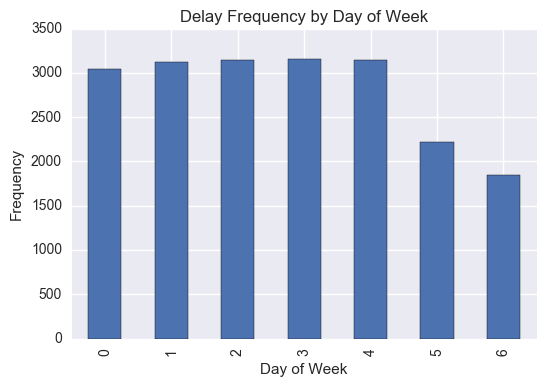

In [381]:
delays.groupby('day_of_week').count()['Datestr'].plot(kind='bar', title='Delay Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

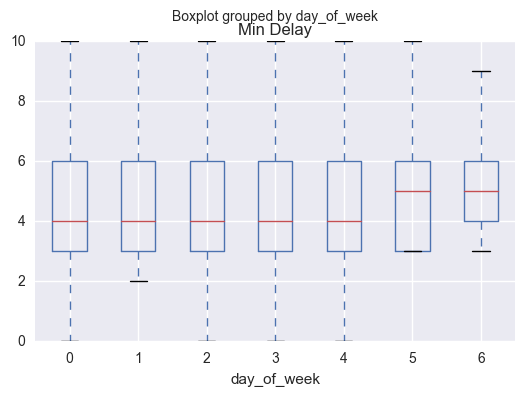

In [373]:
# delays times by day of week
delays.boxplot(column='Min Delay',by='day_of_week',showfliers=False)


In [212]:
# most common delay types
delays.groupby(by='CODE DESCRIPTION').size().sort_values(ascending=False).head()

CODE DESCRIPTION
Disorderly Patron                                           1483
Injured or ill Customer (On Train) - Medical Aid Refused    1390
Injured or ill Customer (On Train) - Transported            1202
Door Problems - Faulty Equipment                            1157
Passenger Assistance Alarm Activated - No Trouble Found      855
dtype: int64

In [395]:
# which stations see the most delays each year?
# terminal stations seem to have the most

station_delays_agg =  delays.groupby(by=[delays.Datestr.dt.year,'Station']).agg({'Time':'count','Min Delay':['mean','median']}).sort_values(by=[('Time','count')],ascending=False)
station_delays_agg.head(10)

Min Delay         Time
                                   mean median count
Datestr Station                                     
2014    EGLINTON STATION       5.977049    4.0   305
2016    KENNEDY BD STATION     5.056106    3.0   303
2014    KIPLING STATION        5.101695    4.0   295
2015    KENNEDY BD STATION     6.445693    3.0   267
2014    KENNEDY BD STATION     4.631579    4.0   266
2016    KIPLING STATION        4.344697    4.0   264
        FINCH STATION          4.008368    4.0   239
2014    FINCH STATION          5.370213    4.0   235
2016    SHEPPARD WEST STATION  5.120172    4.0   233
2014    SHEPPARD WEST STATION  5.637555    4.0   229

In [447]:
# which subway cars have the most delays?
# appears that a vehicle 0 means the incident occured outside a vehicle
vehicle_delay_agg = delays.groupby('Vehicle',as_index=False).agg({'Time':'count'}).rename(columns={'Time':'Freq'}).sort_values(by='Freq',ascending=False)
# vehicle_delay_counts[vehicle_delay_counts['Vehicle']>0].box()?
vehicle_delay_agg.head()

,Vehicle,Freq
0,0,412
24,3007,92
550,5801,85
564,5836,84
436,5436,79


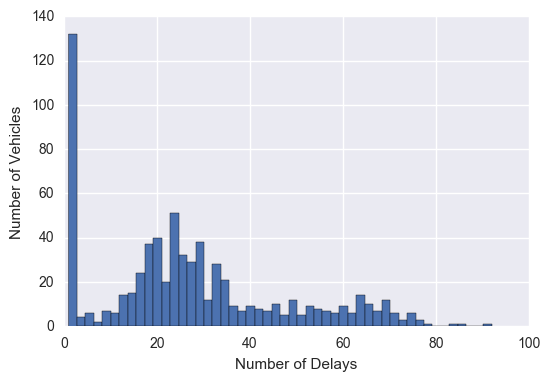

In [448]:
# frequency of delays - how many cars had a certain number of delays?
# a lot of vehicle numbers only ever had 1 delay - are they one offs values?
vehicle_delay_agg[vehicle_delay_agg['Vehicle'] > 0]['Freq'].hist(bins=50)
plt.xlabel('Number of Delays')
plt.ylabel('Number of Vehicles')

In [451]:
delays[delays['Bound'].isin(bounds)].groupby('Bound').agg({'Time':'count','Min Delay':'median'}).sort_values(by='Time',ascending=False)

,Min Delay,Time
Bound,,
S,4,5735
W,4,4930
E,4,4608
N,4,4250


## Non-delays

In [236]:
# understanding zero-delays: what are they?

non_delays = cleaned[(cleaned['Min Delay'] == 0) & (cleaned['Min Gap'] == 0 )]


In [202]:
non_delays.groupby(by='CODE DESCRIPTION').count()['Datestr'].sort_values(ascending=False).head()

CODE DESCRIPTION
Miscellaneous Speed Control                                12336
Operator Overspeeding                                       9452
Miscellaneous General Delays                                3939
Passenger Assistance Alarm Activated - No Trouble Found     3707
Injured or ill Customer (In Station) - Transported          3609
Name: Datestr, dtype: int64

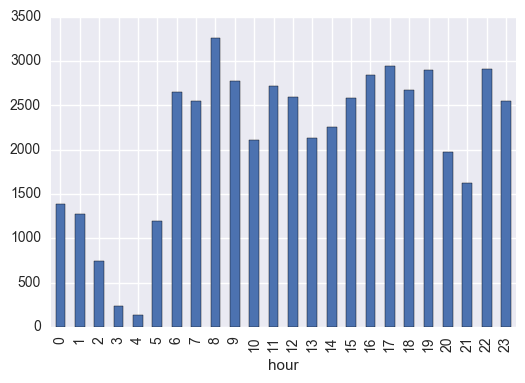

In [239]:
# common non-delay times
non_delays.groupby(by='hour').count()['Datestr'].plot(kind='bar')

# Digging into specific stations/delays/cars (live)

In [ ]:
# digging into specific types of delays and when they happen the most. 
# maybe we can anticipate these?

In [399]:
# rowdiest stations?
# when does injury happen the most? jumpers?

station_delays_agg.head()

Min Delay         Time
                                mean median count
Datestr Station                                  
2014    EGLINTON STATION    5.977049    4.0   305
2016    KENNEDY BD STATION  5.056106    3.0   303
2014    KIPLING STATION     5.101695    4.0   295
2015    KENNEDY BD STATION  6.445693    3.0   267
2014    KENNEDY BD STATION  4.631579    4.0   266

In [401]:
delay_types_agg.head()

,Min Delay,count,Min Gap
CODE DESCRIPTION,,,
Air Conditioning,3.0,155,6.0
Alternating Current,4.0,22,8.0
Assault / Employee Involved,5.0,75,9.0
Assault / Patron Involved,6.0,237,10.0
Axle Counter Related,9.0,3,14.0
